<a href="https://colab.research.google.com/github/Vanshika-goyal1/Stock-Prediction-Model/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [71]:
# Import the libraries
import math
import pandas_datareader as web
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [72]:
#Get the stock quote
# df = web.DataReader('AAPL',start='2016-01-01',end='2023-12-17')
df = yf.download('AAPL', start='2016-01-01', end='2024-06-09')
#Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,23.914482,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.315201,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.858932,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.894180,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.009945,283192000
...,...,...,...,...,...,...
2024-06-03,192.899994,194.990005,192.520004,194.029999,194.029999,50080500
2024-06-04,194.639999,195.320007,193.029999,194.350006,194.350006,47471400
2024-06-05,195.399994,196.899994,194.869995,195.869995,195.869995,54156800


In [73]:
#Get the number of rows and columns in a data set
df.shape

(2122,6)

(2122, 6)

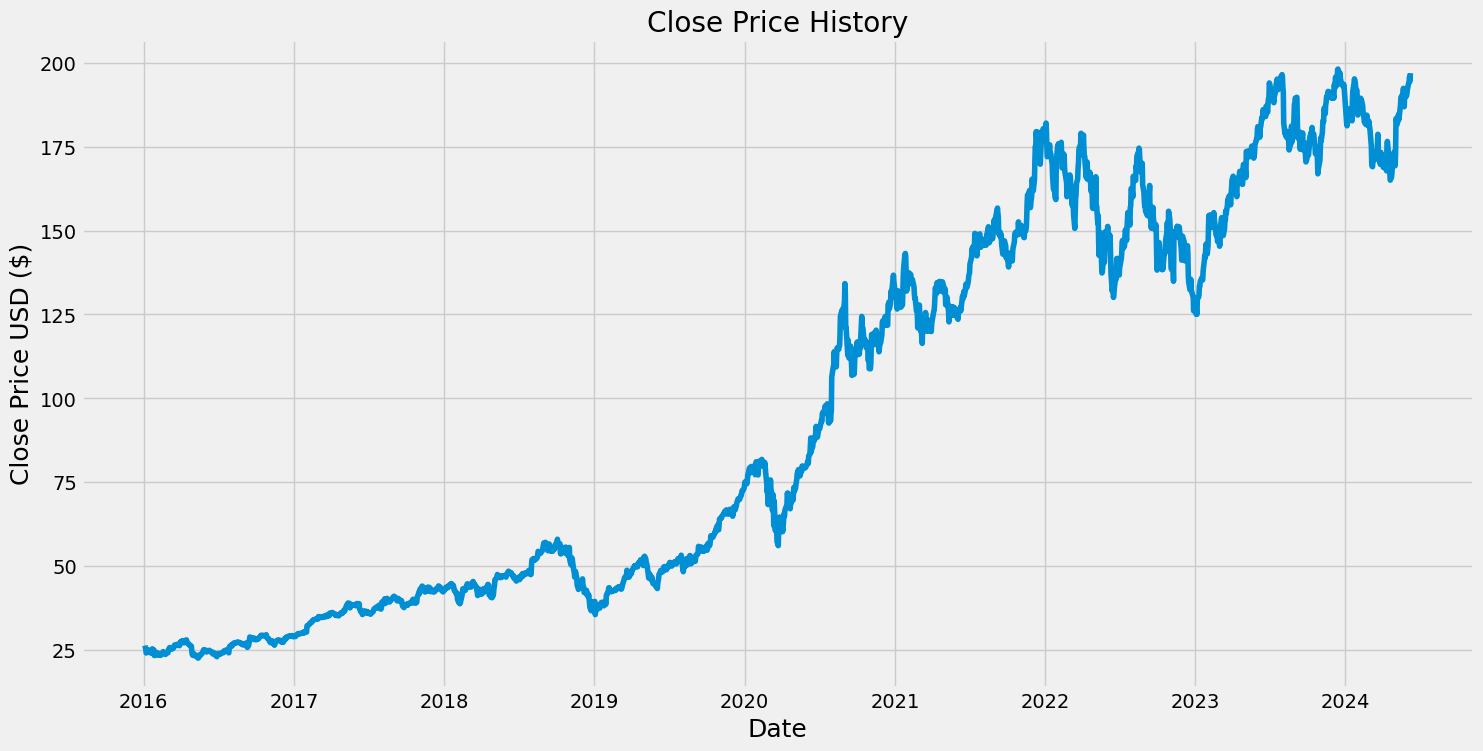

In [74]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [75]:
# Create a new dataframe with only th close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1698

In [76]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02137872],
       [0.01761858],
       [0.01475573],
       ...,
       [0.98723825],
       [0.97931916],
       [0.99304942]])

In [77]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(f'x_train: {x_train}')
        print(f'y_train: {y_train}')
        print()

x_train: [array([0.02137872, 0.01761858, 0.01475573, 0.00870246, 0.00942886,
       0.01166501, 0.01370176, 0.01004131, 0.01307506, 0.00967099,
       0.00900158, 0.00918673, 0.00848883, 0.01578123, 0.01296113,
       0.01374448, 0.00438684, 0.00534112, 0.00997009, 0.00867398,
       0.00589661, 0.00856004, 0.00891611, 0.00524142, 0.00665148,
       0.00662299, 0.00559749, 0.00478564, 0.00519869, 0.00897309,
       0.01108105, 0.00843186, 0.00811851, 0.00931491, 0.00619571,
       0.00820396, 0.009144  , 0.00935765, 0.0090443 , 0.01451361,
       0.01482695, 0.01589518, 0.01804587, 0.01642217, 0.01522575,
       0.01535395, 0.01542516, 0.01697765, 0.01734796, 0.02028202,
       0.02226179, 0.02201966, 0.02219057, 0.02217634, 0.02333002,
       0.02248967, 0.0218345 , 0.02115084, 0.02469734, 0.02737502])]
y_train: [0.026563169582324714]

x_train: [array([0.02137872, 0.01761858, 0.01475573, 0.00870246, 0.00942886,
       0.01166501, 0.01370176, 0.01004131, 0.01307506, 0.00967099,
       

In [78]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [79]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1638, 60, 1)

In [80]:
#Build the LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [81]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [82]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
1638/1638 [==============================] - 63s 36ms/step - loss: 0.0018
Epoch 2/5
1638/1638 [==============================] - 60s 37ms/step - loss: 6.7947e-04
Epoch 3/5
1638/1638 [==============================] - 57s 35ms/step - loss: 5.0387e-04
Epoch 4/5
1638/1638 [==============================] - 57s 35ms/step - loss: 5.8236e-04
Epoch 5/5
1638/1638 [==============================] - 59s 36ms/step - loss: 3.2397e-04


In [83]:
#Create the testing data set
#Create a new array containing scaled values from index 1638 to 2088
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [84]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [85]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [86]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 2s 27ms/step


In [87]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

2.6672457957692663

<ipython-input-88-d07c6f87ff49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


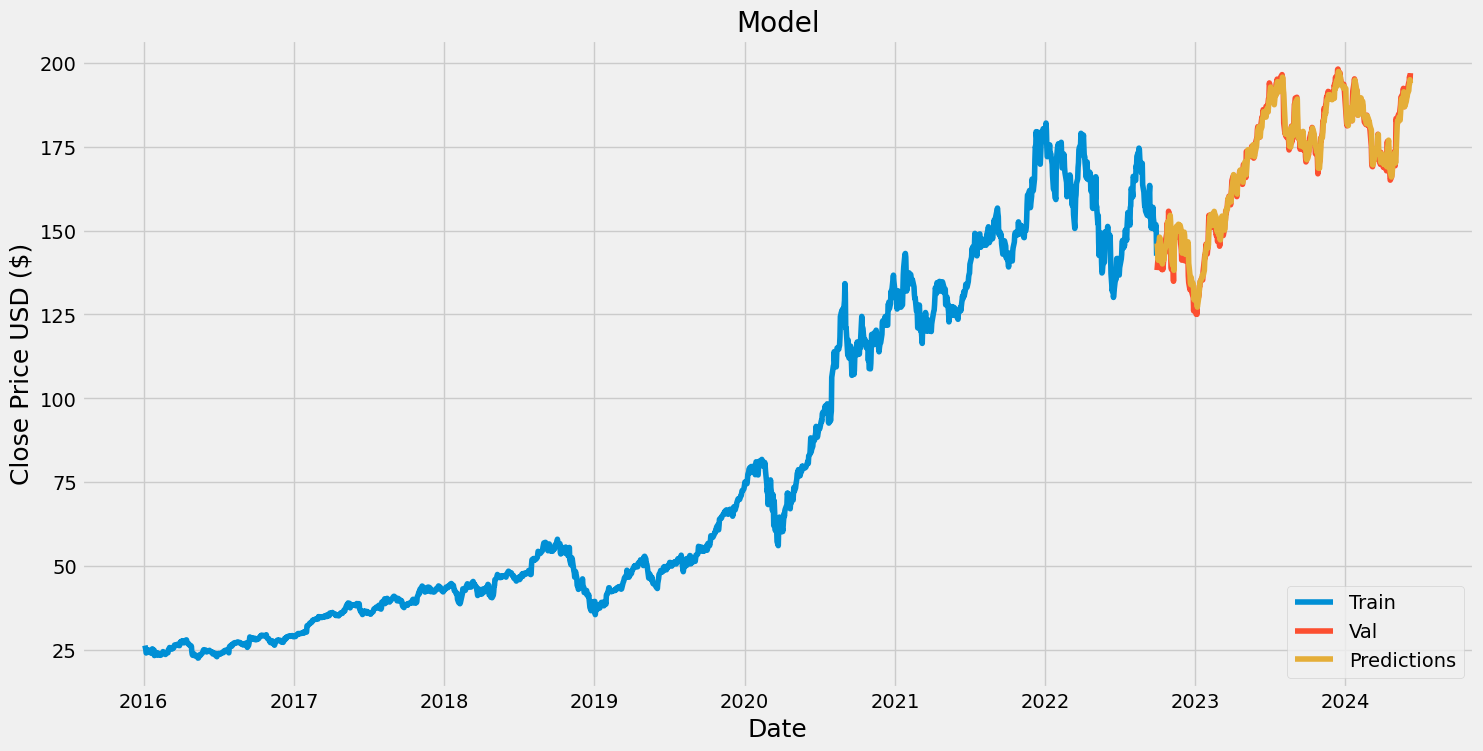

In [88]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [89]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-09-30,138.199997,146.124802
2022-10-03,142.449997,141.131958
2022-10-04,146.100006,142.535110
2022-10-05,146.399994,146.264572
2022-10-06,145.429993,148.033325
...,...,...
2024-06-03,194.029999,191.653839
2024-06-04,194.350006,193.239944
2024-06-05,195.869995,193.783218


In [90]:
#Get the quoate
apple_quote = yf.download('AAPL', start='2016-01-01', end='2024-07-06')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the last 60 days to the list
X_test.append(last_60_days_scaled)
#Convert the list to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(f'Predicted Price: {pred_price}')

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 26ms/step
Predicted Price: [[211.5719]]


In [91]:
#Get the quote
apple_quote2 = yf.download('AAPL', start='2016-01-01', end='2024-06-10')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2016-01-04     26.337500
2016-01-05     25.677500
2016-01-06     25.174999
2016-01-07     24.112499
2016-01-08     24.240000
                 ...    
2024-06-03    194.029999
2024-06-04    194.350006
2024-06-05    195.869995
2024-06-06    194.479996
2024-06-07    196.889999
Name: Close, Length: 2122, dtype: float64
